In [2]:
# Importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing excel file

df = pd.read_excel(r"C:\Users\TOFAEL\OneDrive\Desktop\Diwali Sales\Diwali Sales Data\Diwali Sales Data.xlsx")

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Dropping unwanted/blank columns

df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [7]:
# Checking for null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.shape

(11251, 13)

In [9]:
# Dropping null values 

df.dropna(inplace = True)

In [10]:
df.shape

(11239, 13)

In [11]:
# Changing data type

df["Amount"] = df["Amount"].astype("int")

In [12]:
df["Amount"].dtype

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Basic description of the data

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610908
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355971
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
# Description of specific columns' data

df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610908
std,12.754122,1.115047,5222.355971
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

### Gender

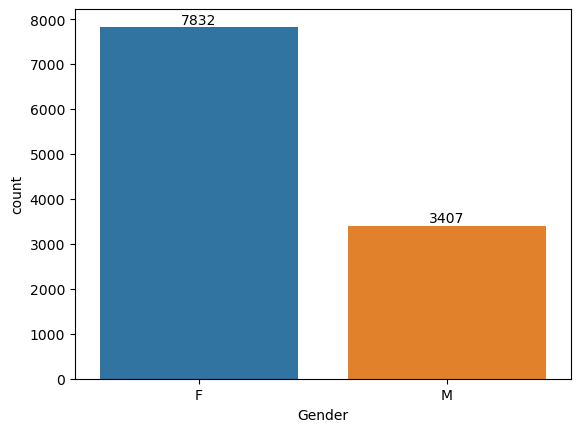

In [16]:
# Plotting a bar chart for Gender and it's count

ax = sns.countplot(x = "Gender", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

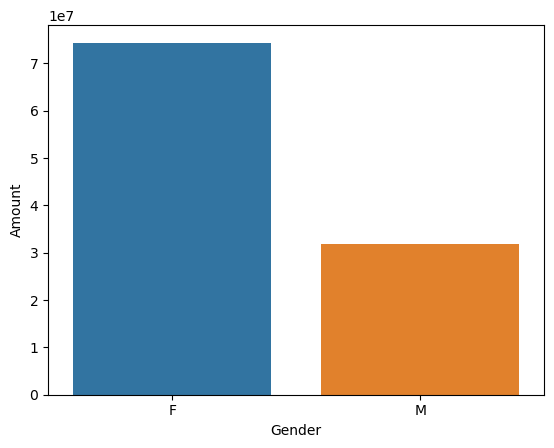

In [17]:
# Plotting a bar chart for gender vs total amount

sales_gen = df.groupby("Gender", as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.barplot(data = sales_gen, x = "Gender", y = "Amount")

*From the above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

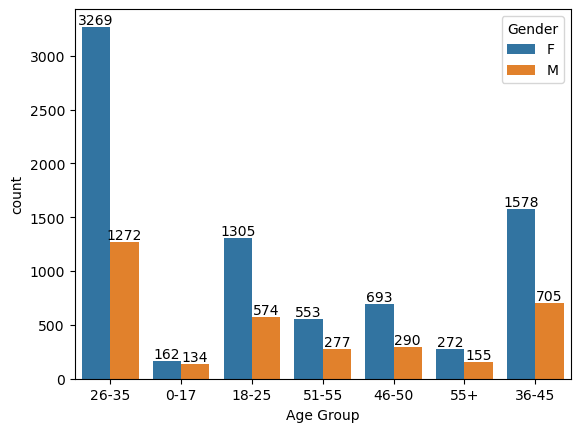

In [19]:
# Gender distribution by Age Group

ax = sns.countplot(data = df, x = "Age Group", hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

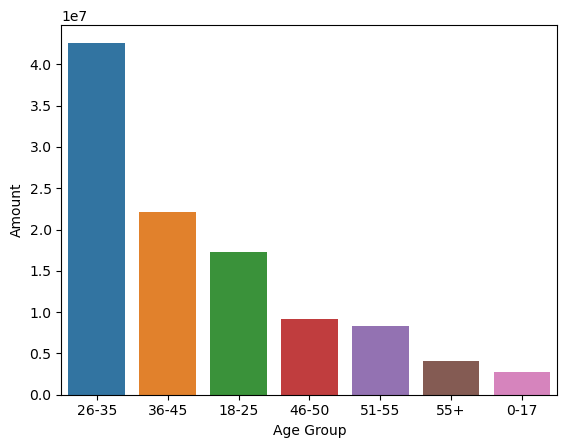

In [20]:
# Total Amount vs Age Group

sales_age = df.groupby("Age Group", as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False) 

sns.barplot(data = sales_age, x = "Age Group", y = "Amount")

*From the above graphs we can see that most of the buyers are of age group between 26-35 years female*

### State

<Axes: xlabel='State', ylabel='Orders'>

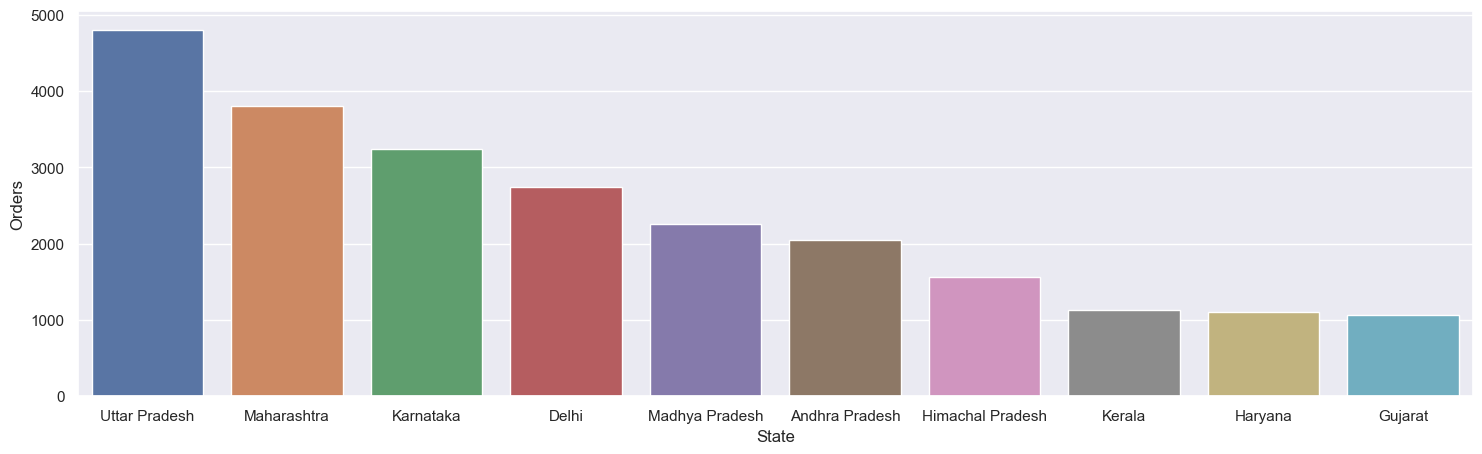

In [22]:
# Total number of orders from top 10 states

sales_state = df.groupby("State", as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc = {"figure.figsize": (18,5)})
sns.barplot(data = sales_state, x = "State", y = "Orders")

<Axes: xlabel='State', ylabel='Amount'>

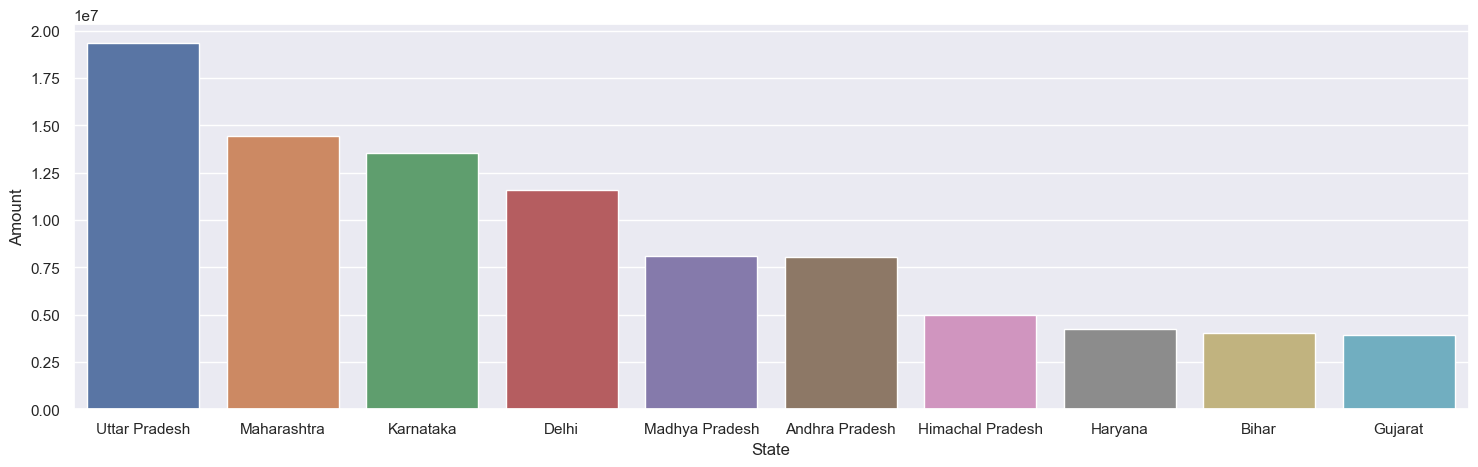

In [23]:
# Total amount/sales from top 10 states

sales_state = df.groupby("State", as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc = {"figure.figsize": (18,5)})
sns.barplot(data = sales_state, x = "State", y = "Amount")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

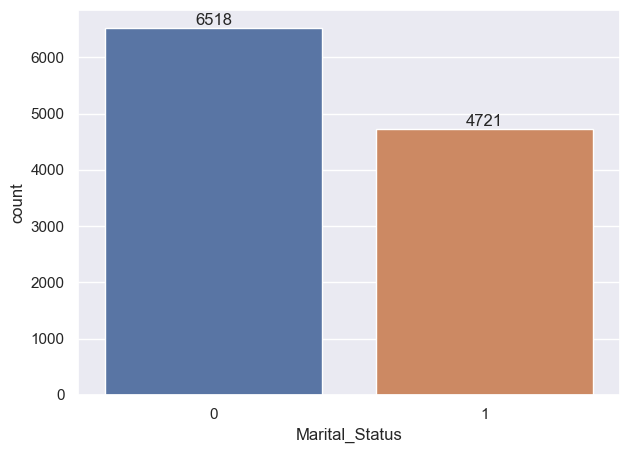

In [32]:
# Plotting a bar chart for marital status and it's count

ax = sns.countplot(data = df, x = "Marital_Status")

sns.set(rc = {"figure.figsize": (5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

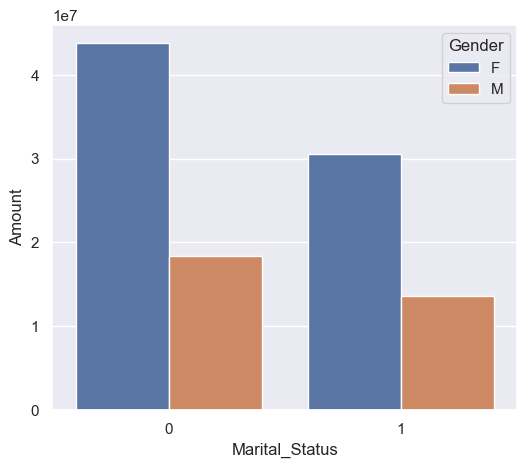

In [35]:
# Plotting a bar chart for marital status and purchasing amount

mrg_sales = df.groupby(["Marital_Status", "Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.set(rc = {"figure.figsize": (6,5)})
sns.barplot(data = mrg_sales, x = "Marital_Status", y = "Amount", hue = "Gender")

*From the above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

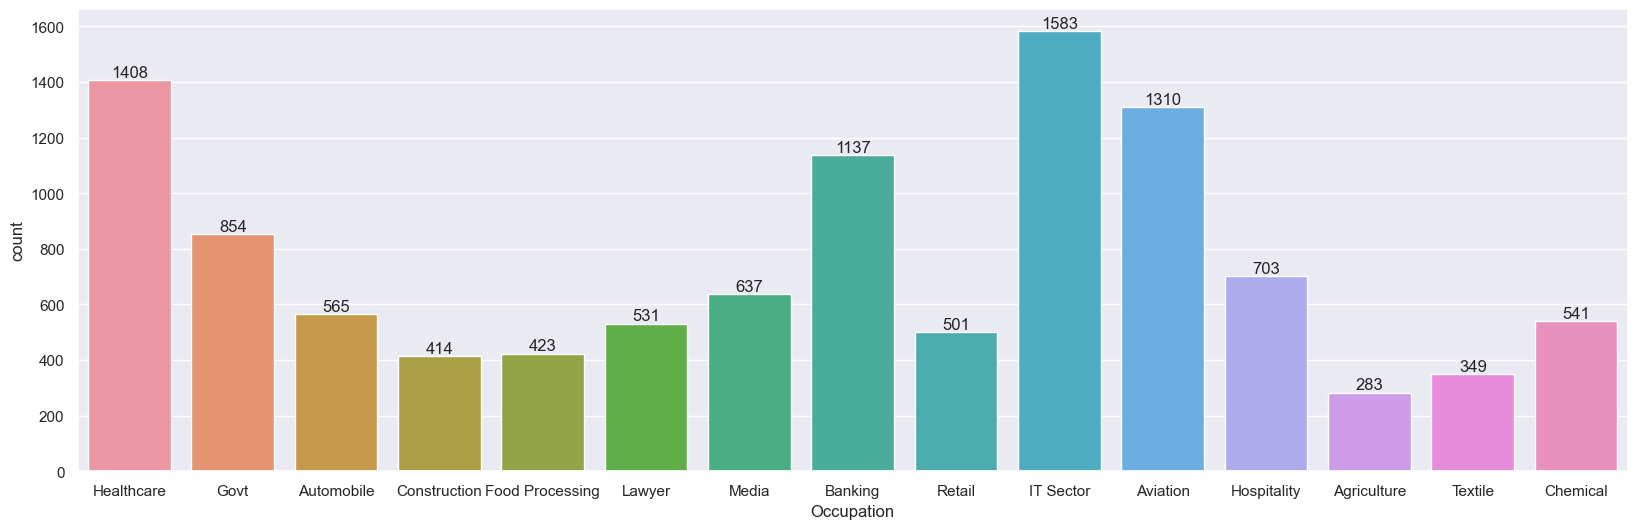

In [41]:
# Number of customers based on occupation

ax = sns.countplot(data = df, x = "Occupation")
sns.set(rc = {"figure.figsize": (20,6)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

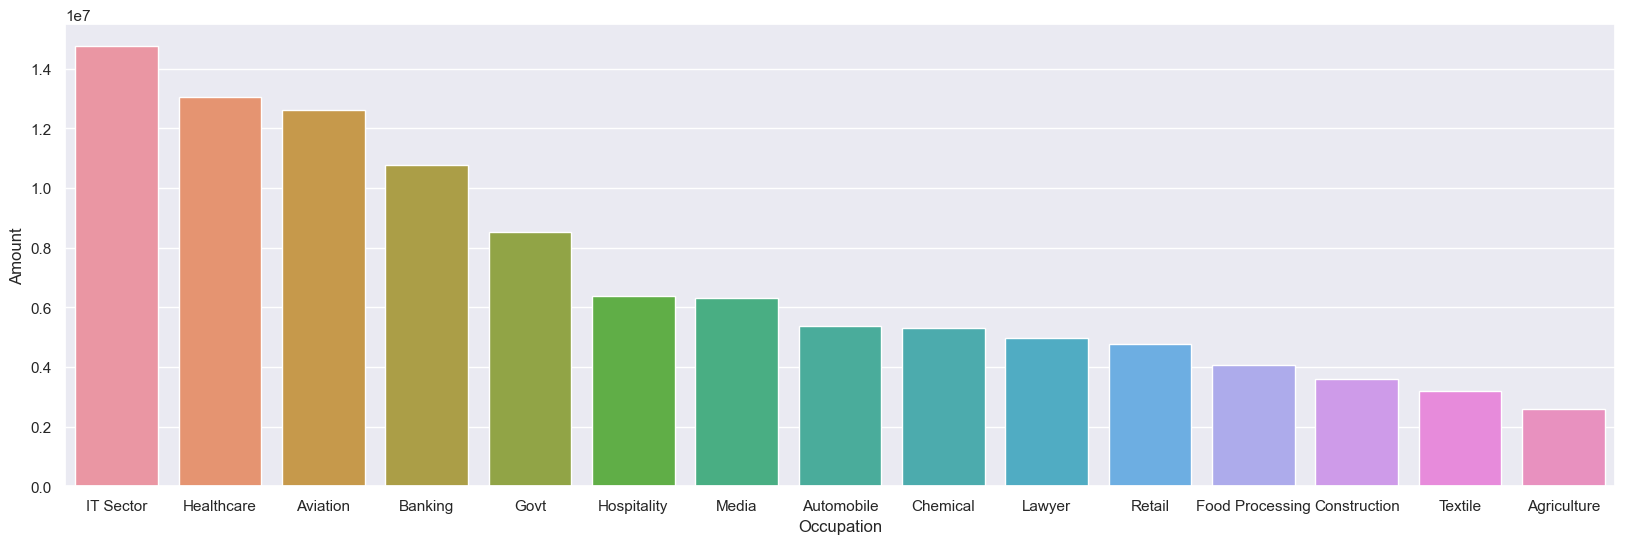

In [42]:
# Purchasing amount by occupation

occ_sales = df.groupby("Occupation", as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.barplot(data = occ_sales, x = "Occupation", y = "Amount")

*From the above graphs we can see that most of the buyers are working in IT, Healthcare, Aviation and Banking sector*

### Product Category

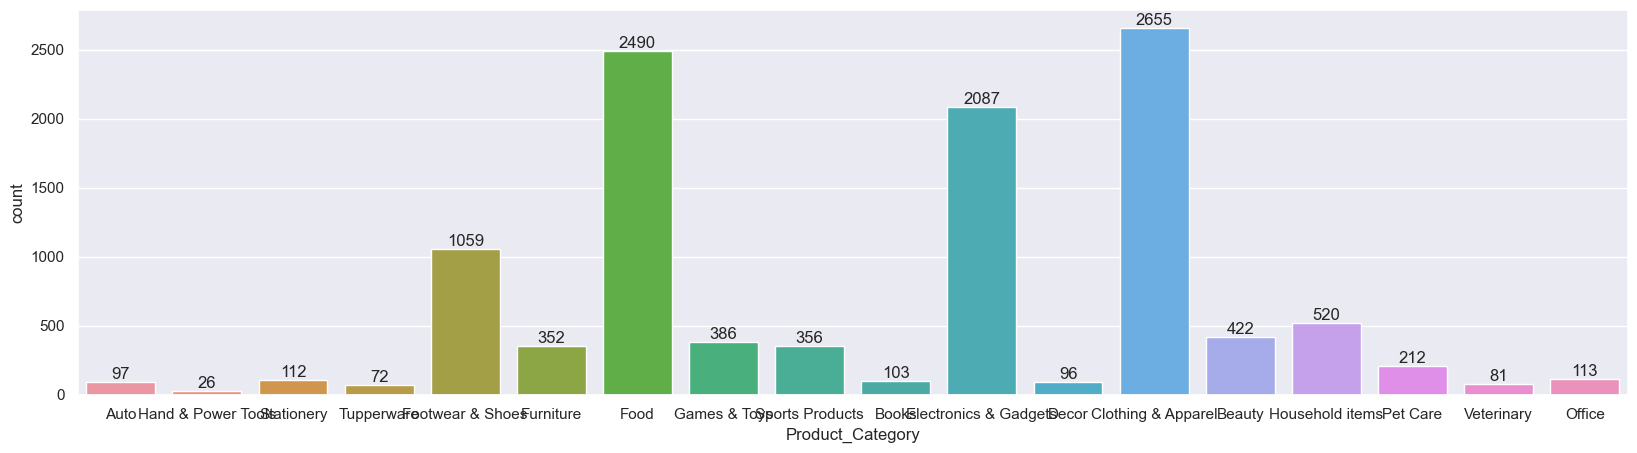

In [52]:
# Couont of products sold by category

ax = sns.countplot(data = df, x = "Product_Category")
sns.set(rc = {"figure.figsize" : (20, 5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

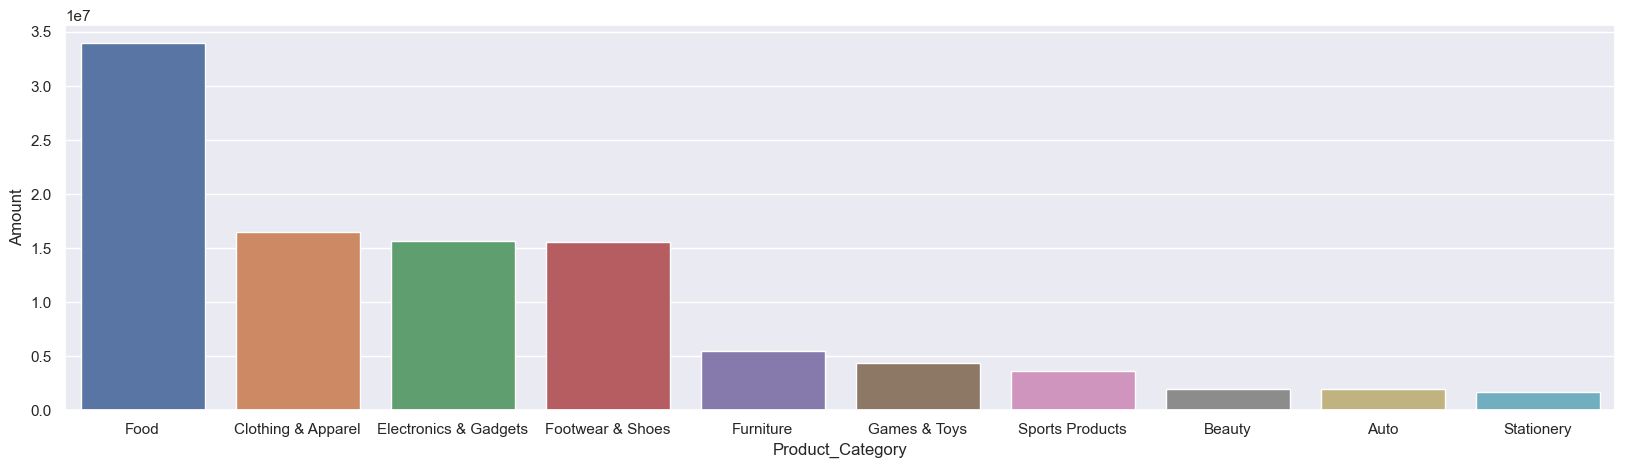

In [57]:
# Product Category vs Amount

ctg_sales = df.groupby("Product_Category", as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.barplot(data = ctg_sales, x = "Product_Category", y = "Amount")


*From the above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

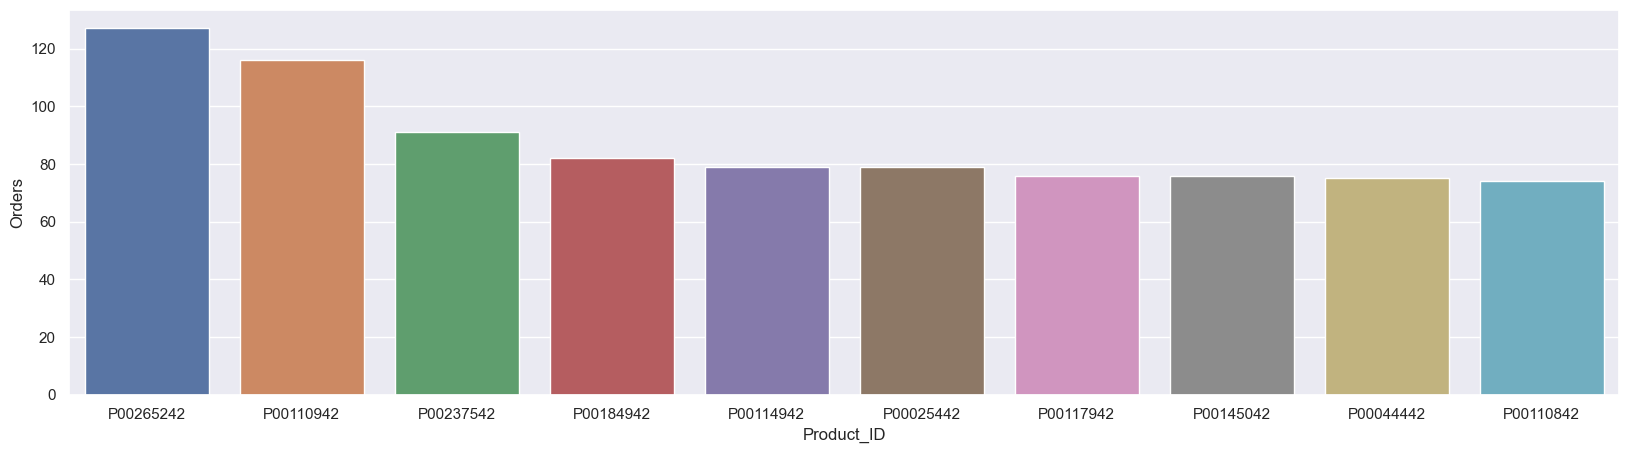

In [59]:
# Top 10 Products

ctg_sales = df.groupby("Product_ID", as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.barplot(data = ctg_sales, x = "Product_ID", y = "Orders")


# Conclsion

*Married women, age group 26-35 years from Uttar Pradesh, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!